Data path : data
Contenu de data : ['agency.txt', 'arrets_lignes.csv', 'booking_rules.txt', 'calendar.txt', 'calendar_dates.txt', 'export_trajectoires.csv', 'mobility.db', 'pathways.txt', 'routes.txt', 'stops.txt', 'stop_extensions.txt', 'stop_times.txt', 'ticketing_deep_links.txt', 'transfers.txt', 'trips.txt']
✔️ Chargement terminé


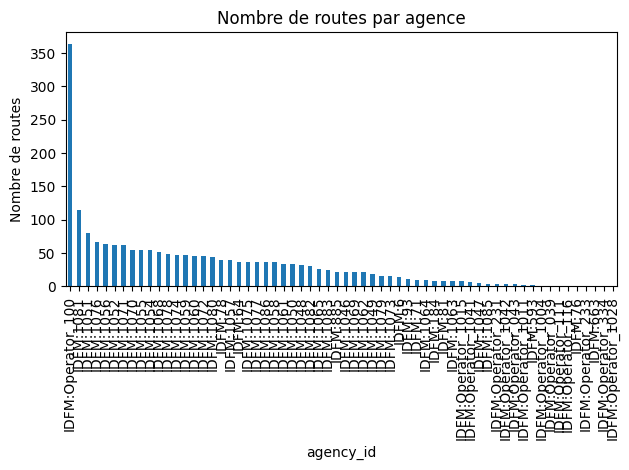

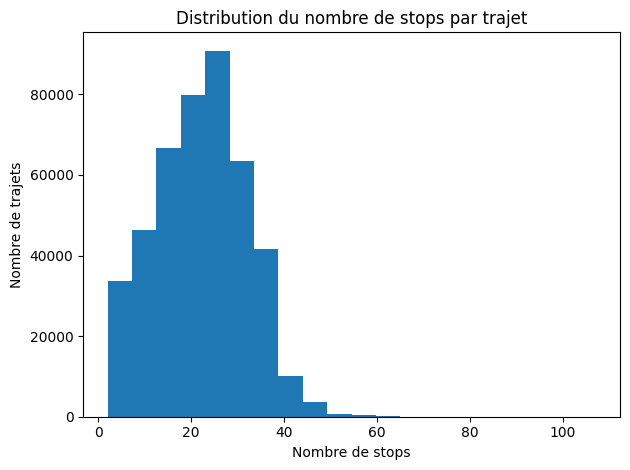

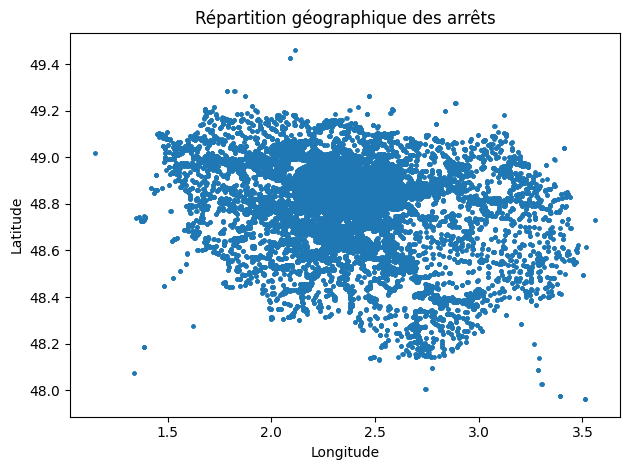

AttributeError: Can only use .dt accessor with datetimelike values

In [5]:
# Cell 1 : Imports, debug & data_path
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# Debug : afficher le contenu de ton dossier data
data_path = Path("data")
print("Data path :", data_path)
print("Contenu de data :", [p.name for p in data_path.iterdir() if p.is_file()])

# Vérification
assert (data_path / "agency.txt").exists(), f"{data_path}/agency.txt introuvable"

# Cell 2 : Chargement des données (avec dtype & low_memory pour éviter les warnings)
agency = pd.read_csv(
    data_path / 'agency.txt',
    dtype=str,
    low_memory=False
)

routes = pd.read_csv(
    data_path / 'routes.txt',
    dtype=str,
    low_memory=False
)

trips = pd.read_csv(
    data_path / 'trips.txt',
    dtype={
        'route_id': str,
        'service_id': str,
        'trip_id': str,
        'trip_headsign': str,
        'trip_short_name': str,
        'direction_id': 'Int64',
        'block_id': str,
        'shape_id': str,
        'wheelchair_accessible': 'Int64',
        'bikes_allowed': 'Int64'
    },
    low_memory=False
)

stops = pd.read_csv(
    data_path / 'stops.txt',
    dtype=str,
    low_memory=False
)

stop_times = pd.read_csv(
    data_path / 'stop_times.txt',
    dtype={
        'trip_id': str,
        'arrival_time': str,
        'departure_time': str,
        'start_pickup_drop_off_window': str,
        'end_pickup_drop_off_window': str,
        'stop_id': str,
        'stop_sequence': 'Int64',
        'pickup_type': 'Int64',
        'drop_off_type': 'Int64',
        'local_zone_id': str,
        'stop_headsign': str,
        'timepoint': 'Int64',
        'pickup_booking_rule_id': str,
        'drop_off_booking_rule_id': str
    },
    low_memory=False
)

arrets_lignes = pd.read_csv(
    data_path / 'arrets_lignes.csv',
    sep=';',
    dtype=str,
    low_memory=False
)

trajectoires = pd.read_csv(
    data_path / 'export_trajectoires.csv',
    parse_dates=['RecordedAtTime', 'ExpectedDepartureTime'],
    dtype=str,
    low_memory=False
)

print("✔️ Chargement terminé")

# Cell 3 : Viz 1 — Nombre de routes par agence
routes_per_agency = routes['agency_id'].value_counts()
plt.figure()
routes_per_agency.plot(kind='bar')
plt.title('Nombre de routes par agence')
plt.xlabel('agency_id')
plt.ylabel('Nombre de routes')
plt.tight_layout()
plt.show()

# Cell 4 : Viz 2 — Distribution du nombre de stops par trajet
stops_per_trip = stop_times.groupby('trip_id').size()
plt.figure()
stops_per_trip.plot(kind='hist', bins=20)
plt.title('Distribution du nombre de stops par trajet')
plt.xlabel('Nombre de stops')
plt.ylabel("Nombre de trajets")
plt.tight_layout()
plt.show()

# Cell 5 : Viz 3 — Répartition géographique des arrêts
plt.figure()
plt.scatter(stops['stop_lon'].astype(float), stops['stop_lat'].astype(float), s=5)
plt.title('Répartition géographique des arrêts')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

# Cell 6 : Viz 4 — Série temporelle des enregistrements de trajectoires
trajectoires['date'] = trajectoires['RecordedAtTime'].dt.date
daily_counts = trajectoires.groupby('date').size()
plt.figure()
daily_counts.plot()
plt.title("Nombre d'enregistrements de trajectoires par jour")
plt.xlabel('Date')
plt.ylabel("Nombre d'enregistrements")
plt.tight_layout()
plt.show()
